In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 加载数据

In [54]:
digits = datasets.load_digits(n_class=10,as_frame=True)

In [56]:
digits.data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [58]:
digits.data.shape

(1797, 64)

In [59]:
digits.target

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

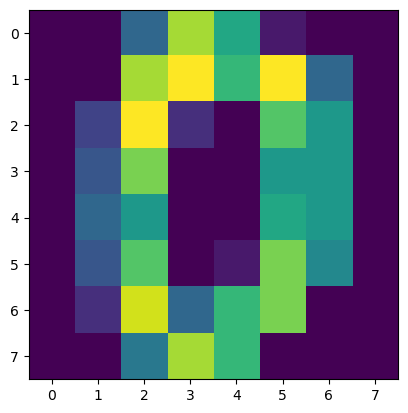

In [60]:
# 查看图像
plt.imshow(digits.images[0])

 # 基本数据处理

## 归一化处理

In [69]:
train_image = digits.data / 63
train_image.values

array([[0.        , 0.        , 0.07936508, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.15873016, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25396825, 0.14285714,
        0.        ],
       ...,
       [0.        , 0.        , 0.01587302, ..., 0.0952381 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03174603, ..., 0.19047619, 0.        ,
        0.        ],
       [0.        , 0.        , 0.15873016, ..., 0.19047619, 0.01587302,
        0.        ]])

In [102]:
digits.target.values

array([0, 1, 2, ..., 8, 9, 8])

# 划分数据集

In [87]:
train_image.shape

(1797, 64)

In [137]:
x_train,x_val,y_train,y_val = train_test_split(train_image.values,digits.target.values,test_size=0.2,random_state=1)

In [138]:
print(x_train.shape,y_train.shape)

(1437, 64) (1437,)


In [198]:
x_train.shape

(1437, 64)

In [199]:
x_val.shape

(360, 64)

# 1

In [111]:
import time
from sklearn.decomposition import PCA

In [200]:
# 多次使用pca,确定最后的最优模型

def n_components_analysis(n, x_train, y_train, x_val, y_val):
    # 记录开始时间
    start = time.time()
    print('测试1',x_train.shape)
    # pca降维实现
    #pca = PCA(n_components=n)
    print("特征降维,传递的参数为:{}".format(n))
    #pca.fit(x_train)
    
    # 在训练集和测试集进行降维
    #x_train_pca = pca.transform(x_train)
    #x_val_pca = pca.transform(x_val)
    
    # 利用svc进行训练
    print("开始使用svc进行训练")
    ss = svm.SVC()
    ss.fit(x_train, y_train)
    
    # 获取accuracy结果
    accuracy = ss.score(x_val, y_val)
    
    # 记录结束时间
    end = time.time()
    print("准确率是:{}, 消耗时间是:{}s".format(accuracy, int(end-start)))
    
    return accuracy 

In [215]:
# 传递多个n_components,寻找合理的n_components:

n_s = np.linspace(0.01, 0.99, num=100)
print(n_s)
accuracy = []

for n in n_s:
    print('x_train',x_train.shape)
    print('x_val',x_val.shape)
    tmp = n_components_analysis(n, x_train, y_train, x_val, y_val)
    accuracy.append(tmp)

[0.01       0.01989899 0.02979798 0.03969697 0.04959596 0.05949495
 0.06939394 0.07929293 0.08919192 0.09909091 0.1089899  0.11888889
 0.12878788 0.13868687 0.14858586 0.15848485 0.16838384 0.17828283
 0.18818182 0.19808081 0.2079798  0.21787879 0.22777778 0.23767677
 0.24757576 0.25747475 0.26737374 0.27727273 0.28717172 0.29707071
 0.3069697  0.31686869 0.32676768 0.33666667 0.34656566 0.35646465
 0.36636364 0.37626263 0.38616162 0.39606061 0.4059596  0.41585859
 0.42575758 0.43565657 0.44555556 0.45545455 0.46535354 0.47525253
 0.48515152 0.49505051 0.50494949 0.51484848 0.52474747 0.53464646
 0.54454545 0.55444444 0.56434343 0.57424242 0.58414141 0.5940404
 0.60393939 0.61383838 0.62373737 0.63363636 0.64353535 0.65343434
 0.66333333 0.67323232 0.68313131 0.6930303  0.70292929 0.71282828
 0.72272727 0.73262626 0.74252525 0.75242424 0.76232323 0.77222222
 0.78212121 0.7920202  0.80191919 0.81181818 0.82171717 0.83161616
 0.84151515 0.85141414 0.86131313 0.87121212 0.88111111 0.89101

准确率是:0.9916666666666667, 消耗时间是:0s
x_train (1437, 64)
x_val (360, 64)
测试1 (1437, 64)
特征降维,传递的参数为:0.5643434343434344
开始使用svc进行训练
准确率是:0.9916666666666667, 消耗时间是:0s
x_train (1437, 64)
x_val (360, 64)
测试1 (1437, 64)
特征降维,传递的参数为:0.5742424242424242
开始使用svc进行训练
准确率是:0.9916666666666667, 消耗时间是:0s
x_train (1437, 64)
x_val (360, 64)
测试1 (1437, 64)
特征降维,传递的参数为:0.5841414141414141
开始使用svc进行训练
准确率是:0.9916666666666667, 消耗时间是:0s
x_train (1437, 64)
x_val (360, 64)
测试1 (1437, 64)
特征降维,传递的参数为:0.594040404040404
开始使用svc进行训练
准确率是:0.9916666666666667, 消耗时间是:0s
x_train (1437, 64)
x_val (360, 64)
测试1 (1437, 64)
特征降维,传递的参数为:0.6039393939393939
开始使用svc进行训练
准确率是:0.9916666666666667, 消耗时间是:0s
x_train (1437, 64)
x_val (360, 64)
测试1 (1437, 64)
特征降维,传递的参数为:0.6138383838383838
开始使用svc进行训练
准确率是:0.9916666666666667, 消耗时间是:0s
x_train (1437, 64)
x_val (360, 64)
测试1 (1437, 64)
特征降维,传递的参数为:0.6237373737373737
开始使用svc进行训练
准确率是:0.9916666666666667, 消耗时间是:0s
x_train (1437, 64)
x_val (360, 64)
测试1 (1437, 64)
特征降维,传递的参数为:0.63363636363636

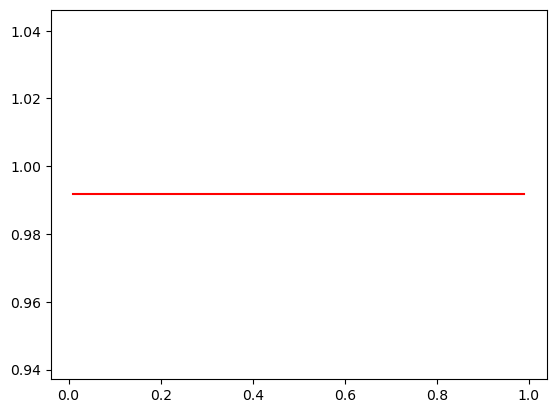

In [216]:
# 准确率可视化展示
plt.plot(n_s, np.array(accuracy), "r")
plt.show()

经过图片观测，选择合理的n_components = 0.83

In [146]:
x_train.shape

(1437, 64)

In [166]:

pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.fit_transform(x_val)

In [167]:
print(x_train_pca.shape,x_val_pca.shape)

(1437, 28) (360, 28)


In [203]:
svc = svm.SVC(probability=True) 
#svc.fit(x_train_pca,y_train)
#svc.score(x_val_pca,y_val)
svc.fit(x_train,y_train)
svc.score(x_val,y_val)

0.9916666666666667

# 测试

In [204]:
digits_test = datasets.load_digits(n_class=9,as_frame=True)

In [205]:
digits_test.data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,0.0,0.0,5.0,12.0,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,12.0,12.0,3.0,0.0,0.0
1613,0.0,0.0,0.0,3.0,15.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,16.0,4.0,0.0,0.0
1614,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1615,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0


In [211]:
#digits_test_pca = pca.fit_transform(digits_test.data)
#digits_test_pca.shape
digits_test.target

0       0
1       1
2       2
3       3
4       4
       ..
1612    8
1613    4
1614    0
1615    8
1616    8
Name: target, Length: 1617, dtype: int32

In [212]:
digits_test.data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,0.0,0.0,5.0,12.0,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,12.0,12.0,3.0,0.0,0.0
1613,0.0,0.0,0.0,3.0,15.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,16.0,4.0,0.0,0.0
1614,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1615,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0


In [210]:
predict = svc.predict(digits_test.data)
predict

E:\develop\Anaconda-evns\qiankun\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

AttributeError: 'numpy.ndarray' object has no attribute 'descibe'